## Dataset download from Kaggle:
## https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) ever-married: "No" or "Yes"

6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"

8) avgglucoselevel: average glucose level in blood

9) bmi: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## 1) Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('brain_stroke_classification.csv')
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

## 2) Data Analisys

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
#check the number of unique values in each column
for i in df.columns:
    print(f"",i,":",df[i].nunique())

 gender : 2
 age : 104
 hypertension : 2
 heart_disease : 2
 ever_married : 2
 work_type : 4
 Residence_type : 2
 avg_glucose_level : 3895
 bmi : 342
 smoking_status : 4
 stroke : 2


In [5]:
#verifying Null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
#check for duplicate values
df.duplicated().sum()

0

Text(0.5, 1.0, 'Stroke Distribution')

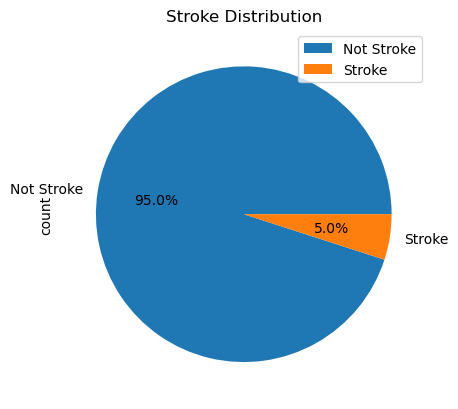

In [7]:
# check dataset balance
df.stroke.value_counts().plot(kind = 'pie',legend=True, labels=['Not Stroke','Stroke'],autopct='%1.1f%%')
plt.title("Stroke Distribution")

In [8]:
df.stroke.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

### We noticed that we have an umbalanced data with only 5% stroke. We need to reduce data of people without stroke or increase the data of people with stroke

In [9]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

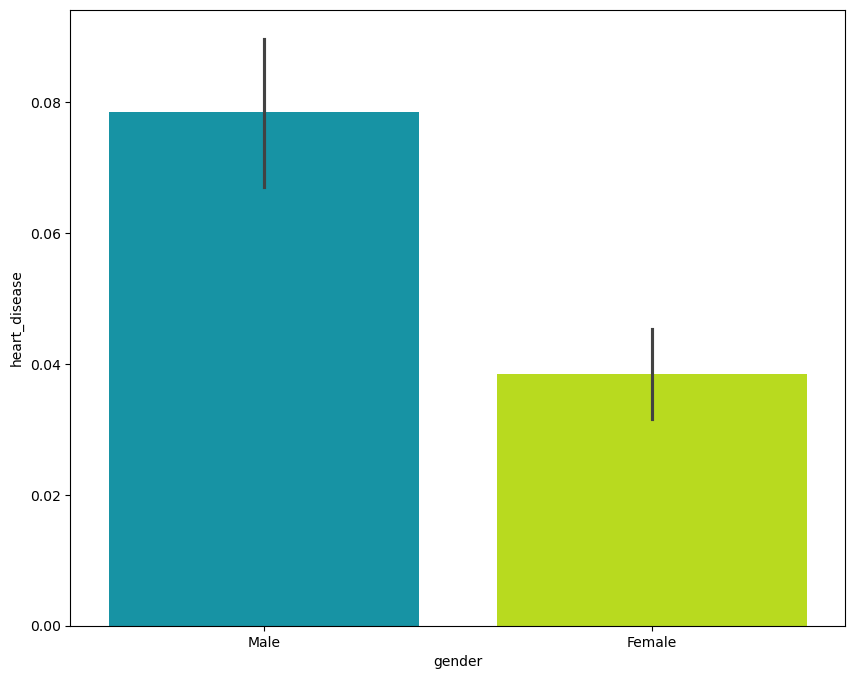

In [10]:
#Check the number of heart desease based on gender
plt.figure(figsize = (10,8))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["gender"], y = df["heart_disease"], palette = "nipy_spectral");

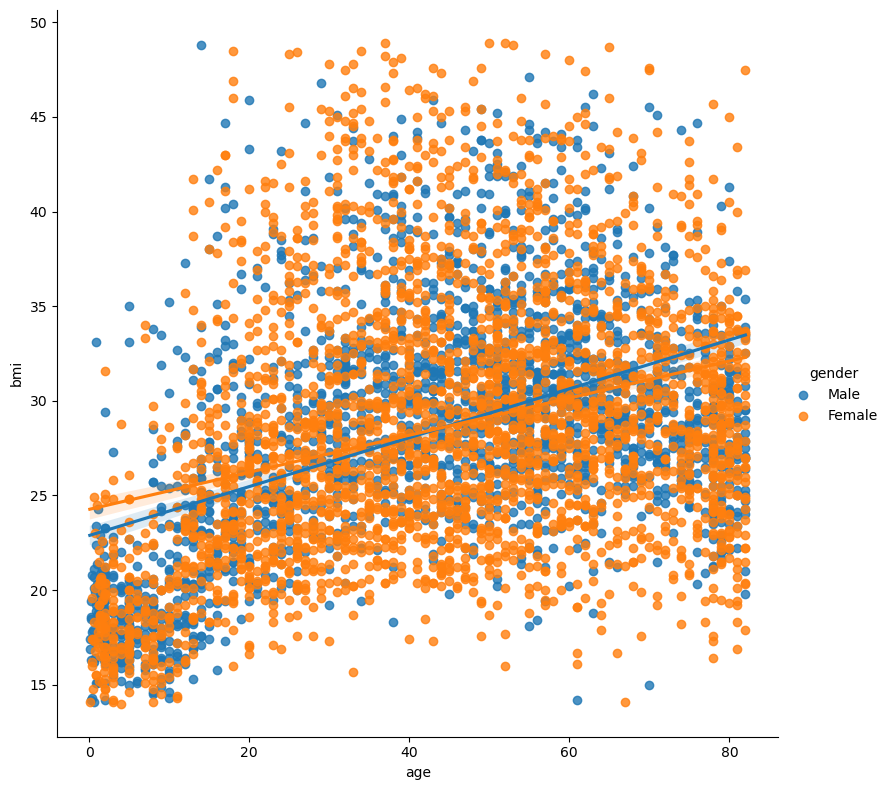

In [11]:
#check the bmi and age based on gender
sns.lmplot(data=df,x="age", y="bmi", hue="gender",height=8);

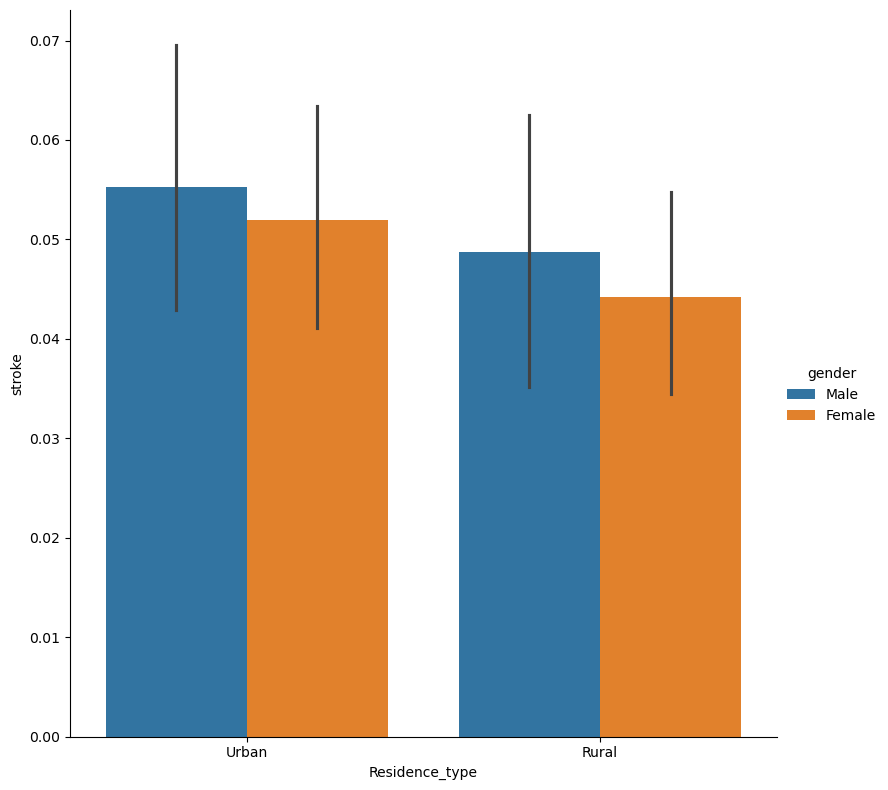

In [12]:
#check the Residential type and gender of those 
sns.catplot(data=df, kind="bar", x="Residence_type", y="stroke", hue="gender",height=8);

<Axes: >

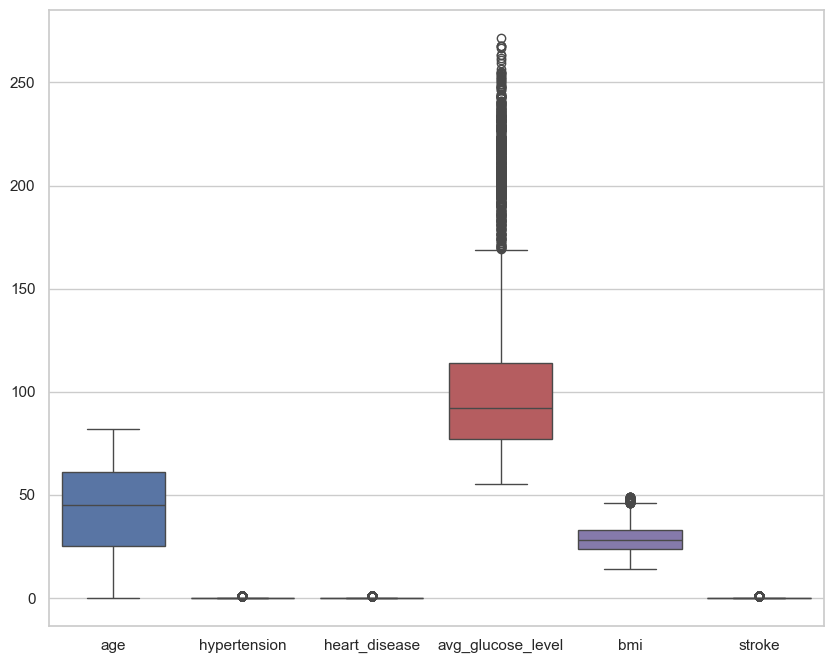

In [13]:
# lets check is our data has outliers
sns.set(style='whitegrid',color_codes=True)
plt.figure(figsize =(10,8))
sns.boxplot(data = df,width=0.8)

In [14]:
mean = np.mean(df.avg_glucose_level)
sd = np.std(df.avg_glucose_level)
print(f"Mean: ",mean)
print(f"Median: ",np.median(df.avg_glucose_level))
print(f"Std: ",sd)

Mean:  105.94356153382854
Median:  91.85
Std:  45.07084785004806


### Lets create a copy of the dataset so we can start to manipulate it

In [15]:
# before make any changes, let's create a copy of ou database. It is important to always manipulate the copy instead of the original.
df_copy = df.copy()
df_copy.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [16]:
df_copy.stroke.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

### Lets transform categorical variable to numeric

In [17]:
# use get dummies to make categorical variable into new numeric column
df_dummies = pd.get_dummies(df_copy).astype(int)
df_dummies

age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  \
0      67             0              1                228   36       1   
1      80             0              1                105   32       1   
2      49             0              0                171   34       1   
3      79             1              0                174   24       1   
4      81             0              0                186   29       1   
...   ...           ...            ...                ...  ...     ...   
4976   41             0              0                 70   29       0   
4977   40             0              0                191   31       0   
4978   45             1              0                 95   31       0   
4979   40             0              0                 83   30       0   
4980   80             1              0                 83   29       0   

      gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0                 0            1                0                 1   
1                 0            1                0                 1   
2                 1            0                0                 1   
3                 1            0                0                 1   
4                 0            1                0                 1   
...             ...          ...              ...               ...   
4976              0            1                1                 0   
4977              0            1                0                 1   
4978              1            0                0                 1   
4979              0            1                0                 1   
4980              1            0                0                 1   

      work_type_Govt_job  work_type_Private  work_type_Self-employed  \
0                      0                  1                        0   
1                      0                  1                        0   
2                      0                  1                        0   
3                      0                  0                        1   
4                      0                  1                        0   
...                  ...                ...                      ...   
4976                   0                  1                        0   
4977                   0                  1                        0   
4978                   1                  0                        0   
4979                   0                  1                        0   
4980                   0                  1                        0   

      work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                      0                     0                     1   
1                      0                     1                     0   
2                      0                     0                     1   
3                      0                     1                     0   
4                      0                     0                     1   
...                  ...                   ...                   ...   
4976                   0                     1                     0   
4977                   0                     0                     1   
4978                   0                     1                     0   
4979                   0                     1                     0   
4980                   0                     0                     1   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               1   
...                      ...                             ...   
4976                       0                               1   
4977                  

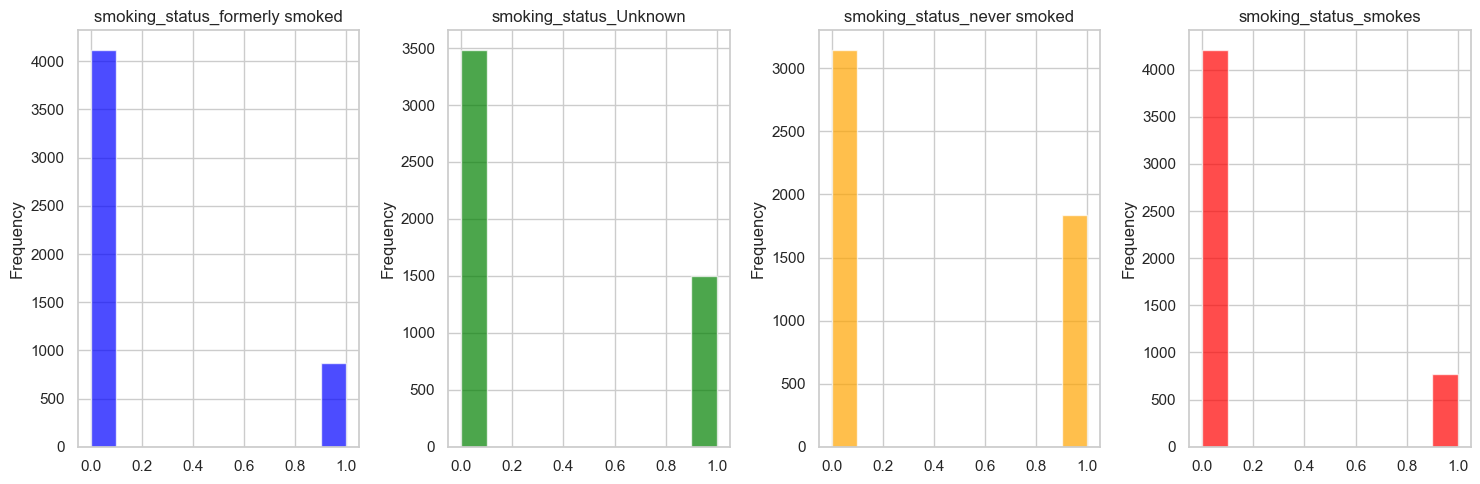

In [18]:
#plot the graphics based on frequency of values
columns_to_plot = ["smoking_status_formerly smoked", "smoking_status_Unknown", "smoking_status_never smoked", "smoking_status_smokes"]

colors = ['blue', 'green', 'orange', 'red']

fig, axs = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    df_dummies[column].plot(kind="hist", ax=axs[i], color=colors[i], alpha=0.7) 
    axs[i].set_title(column) 

plt.tight_layout()
plt.show()

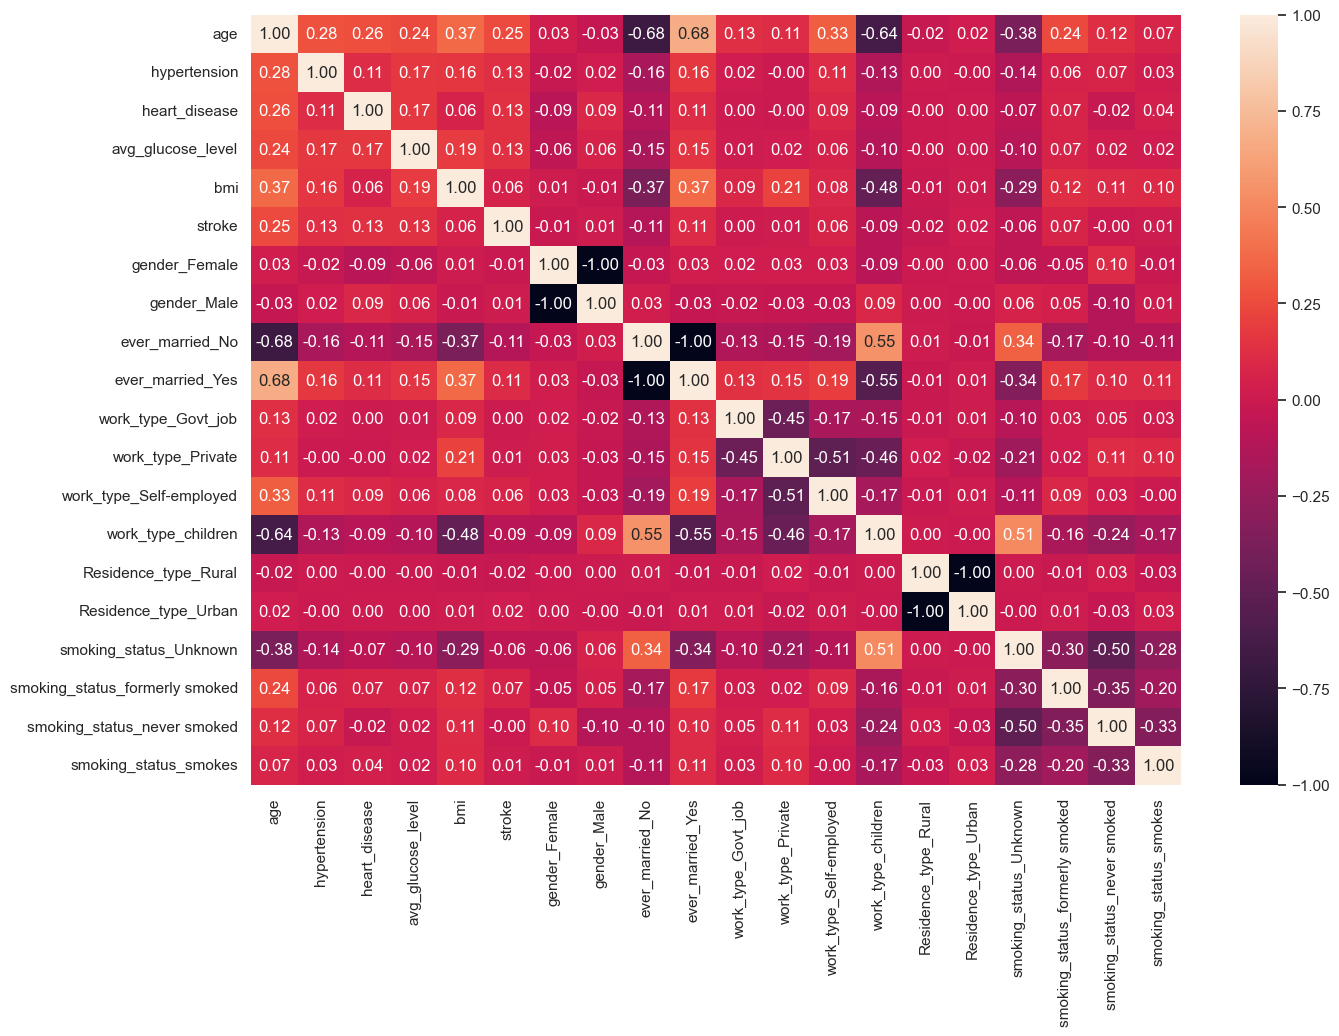

In [19]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df_dummies.corr(),annot=True,fmt=".2f");

# 3) Preprocessing

### Train Validation Test / MinMaxScaler Normalize data maximize process

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
len(df_dummies)

4981

In [22]:
#shuffle table
df_shuffled = df_dummies.sample(frac=1).reset_index(drop=True)

# separate target variable
X = df_shuffled.drop("stroke", axis=1)
y = df_shuffled["stroke"]

#apply normalization of X values
scaler = MinMaxScaler()
X_normalize = scaler.fit_transform(X)
X_normalize

array([[0.65853659, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.20731707, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.97560976, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79268293, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.59756098, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.69512195, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
#devide into train_validation_test
X_train, y_train = X[:3000], y[:3000]
X_val, y_val = X[3000:4000], y[3000:4000]
X_test, y_test = X[4000:], y[4000:]

In [24]:
#verifying X shape
X_train.shape, X_val.shape, X_test.shape

((3000, 19), (1000, 19), (981, 19))

In [25]:
#verifying y shape
y_train.shape, y_val.shape, y_test.shape

((3000,), (1000,), (981,))

In [26]:
#check if the stroke value is balanced in each y
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(stroke
 0    2844
 1     156
 Name: count, dtype: int64,
 stroke
 0    950
 1     50
 Name: count, dtype: int64,
 stroke
 0    939
 1     42
 Name: count, dtype: int64)

# 4) Apply Machine Learning

In [27]:
#put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [28]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [29]:
%%time 
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

CPU times: total: 1.61 s
Wall time: 379 ms


{'Logistic Regression': 0.95, 'KNN': 0.941, 'Random Forest': 0.948}

### GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

modeloLR = LogisticRegression()

velores_grid = {'penalty':['l1','l2','elasticnet', 'none'], 
                'C':[0.001,0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(estimator = modeloLR, 
                    param_grid = velores_grid,
                    cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [31]:
print("Acurácia : %.3f" % (grid.best_score_ *100))
print("Melhores parâmetros do modelo: ", grid.best_estimator_)

Acurácia : 94.900
Melhores parâmetros do modelo:  LogisticRegression(C=100)


In [32]:
from sklearn.tree import DecisionTreeClassifier

modeloDTC = DecisionTreeClassifier()

seed = 42
interations = 14

valor_grid = {'max_features':[3,5,7,9,10], 
              'max_depth':[2,3,4,5,10,15]}

gsearch = GridSearchCV(estimator = modeloDTC, 
                       param_grid = valor_grid,
                       cv=5)

gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15],
                         'max_features': [3, 5, 7, 9, 10]})

In [33]:
print("Acurácia : %.3f" % (gsearch.best_score_ *100))
print("Melhores parâmetros do modelo: ", gsearch.best_estimator_)

Acurácia : 94.933
Melhores parâmetros do modelo:  DecisionTreeClassifier(max_depth=4, max_features=5)


### create models with best parameters and predict Test dataset

In [34]:
modelDTC = DecisionTreeClassifier(max_depth=15, max_features=7)
modelLR = LogisticRegression(C=1)

In [35]:
modeloDTC.fit(X_train,y_train)
pred_DTC = modeloDTC.predict(X_test)
pred_DTC

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
modelLR.fit(X_train,y_train)
pred_LR = modelLR.predict(X_test)
pred_LR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Metrics verification

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Decision Tree Classified

In [38]:
print('Confusion Matrix\n', confusion_matrix(y_test,pred_DTC))

print("\n",classification_report(y_test,pred_DTC))

DTC_acc = np.mean(np.equal(y_test,pred_DTC))

print('Accuracy of Decision Tree Classified: ', DTC_acc)

Confusion Matrix
 [[894  45]
 [ 37   5]]

               precision    recall  f1-score   support

           0       0.96      0.95      0.96       939
           1       0.10      0.12      0.11        42

    accuracy                           0.92       981
   macro avg       0.53      0.54      0.53       981
weighted avg       0.92      0.92      0.92       981

Accuracy of Decision Tree Classified:  0.9164118246687054


#### Logistic Regression

In [39]:
print('Confusion Matrix\n', confusion_matrix(y_test,pred_LR))

print("\n",classification_report(y_test,pred_LR))

LR_acc = np.mean(np.equal(y_test,pred_LR))

print('Accuracy of LogisticRegression: ', LR_acc)

Confusion Matrix
 [[938   1]
 [ 42   0]]

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        42

    accuracy                           0.96       981
   macro avg       0.48      0.50      0.49       981
weighted avg       0.92      0.96      0.94       981

Accuracy of LogisticRegression:  0.9561671763506626


### Since the number of people without stroke is less than people with stroke, our model is overfiting. There is a 98% of every guess be right. Let apply the Smote and see how our model will perform with balanced data

### Smote

In [40]:
from imblearn.over_sampling import SMOTE

print(f"Difference between people with Stroke and without Stroke {np.bincount(y)}. 19x more information.\n\n") 

smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X,y)
print(f"Smote creates new lines with similar data to balance the variable with less values. After apply Smote {np.bincount(y_resampled)} the numbers are equal.\n")

Difference between people with Stroke and without Stroke [4733  248]. 19x more information.


Smote creates new lines with similar data to balance the variable with less values. After apply Smote [4733 4733] the numbers are equal.



In [41]:
#shuffle dataset again
from sklearn.utils import shuffle

# Combine synthetic and original samples into a balanced dataset
X_balanced = np.vstack((X, X_resampled))
y_balanced = np.hstack((y, y_resampled))

# Shuffle the balanced dataset
X_balanced_shuffled, y_balanced_shuffled = shuffle(X_resampled, y_resampled, random_state=42)

In [42]:
np.bincount(y_balanced_shuffled)

array([4733, 4733], dtype=int64)

In [43]:
X_normalize = scaler.fit_transform(X_balanced_shuffled)

In [44]:
X_normalize.shape, y_balanced_shuffled.shape

((9466, 19), (9466,))

In [45]:
#devide into train_validation_test 60% 20% 20%
X_train, y_train = X_normalize[:5678], y_balanced_shuffled[:5678]
X_val, y_val = X_normalize[5678:7572], y_balanced_shuffled[5678:7572]
X_test, y_test = X_normalize[7572:], y_balanced_shuffled[7572:]

In [46]:
#verifying X shape
X_train.shape, X_val.shape, X_test.shape

((5678, 19), (1894, 19), (1894, 19))

In [47]:
#verifying y shape
y_train.shape, y_val.shape, y_test.shape

((5678,), (1894,), (1894,))

In [48]:
#check if the stroke value is balanced in each y
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(stroke
 0    2872
 1    2806
 Name: count, dtype: int64,
 stroke
 1    983
 0    911
 Name: count, dtype: int64,
 stroke
 0    950
 1    944
 Name: count, dtype: int64)

#### Predict new dataset with Smote

In [49]:
modeloDTC.fit(X_train,y_train)
pred_DTC_Smote = modeloDTC.predict(X_test)
pred_DTC_Smote

array([0, 0, 1, ..., 1, 0, 1])

In [50]:
modelLR.fit(X_train,y_train)
pred_LR_Smote = modelLR.predict(X_test)
pred_LR_Smote

array([0, 0, 1, ..., 0, 0, 1])

#### Verifying Metrics on new dataset

In [51]:
print('Confusion Matrix\n', confusion_matrix(y_test,pred_DTC_Smote))

print("\n",classification_report(y_test,pred_DTC_Smote))

DTC_Smote_acc = np.mean(np.equal(y_test,pred_DTC_Smote))

print('Accuracy of Decision Tree Classified: ', DTC_Smote_acc)

Confusion Matrix
 [[878  72]
 [ 51 893]]

               precision    recall  f1-score   support

           0       0.95      0.92      0.93       950
           1       0.93      0.95      0.94       944

    accuracy                           0.94      1894
   macro avg       0.94      0.94      0.94      1894
weighted avg       0.94      0.94      0.94      1894

Accuracy of Decision Tree Classified:  0.9350580781414994


In [52]:
print('Confusion Matrix\n', confusion_matrix(y_test,pred_LR_Smote))

print("\n",classification_report(y_test,pred_LR_Smote))

LR_Smote_acc = np.mean(np.equal(y_test,pred_LR_Smote))

print('Accuracy of LogisticRegression: ', LR_Smote_acc)

Confusion Matrix
 [[949   1]
 [ 90 854]]

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       950
           1       1.00      0.90      0.95       944

    accuracy                           0.95      1894
   macro avg       0.96      0.95      0.95      1894
weighted avg       0.96      0.95      0.95      1894

Accuracy of LogisticRegression:  0.9519535374868004


#### Plot graphics to verify the best accuracy

In [53]:
result_df = pd.DataFrame({"Decision Tree Classified" : DTC_acc,
                          "Logistic Regression" : LR_acc,
                          "Decision Tree Classified with Smote" : DTC_Smote_acc,
                          "Logistic Regression with Smote" : LR_Smote_acc}, index = [1]) 

Decision Tree Classified  Logistic Regression  \
1                  0.916412             0.956167   

   Decision Tree Classified with Smote  Logistic Regression with Smote  
1                             0.935058                        0.951954

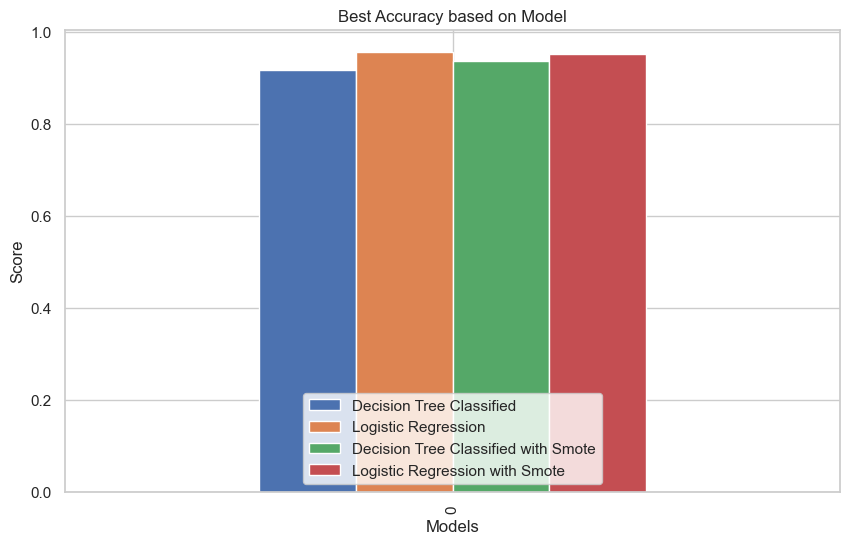

In [54]:
display(result_df)
print("\n")
result_df.plot(kind='bar',
               figsize=(10,6),
               use_index=False)

plt.title("Best Accuracy based on Model")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(loc='lower center')
plt.show();